<a href="https://colab.research.google.com/github/cry4alone/HACKapp/blob/main/Lab1TERVER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

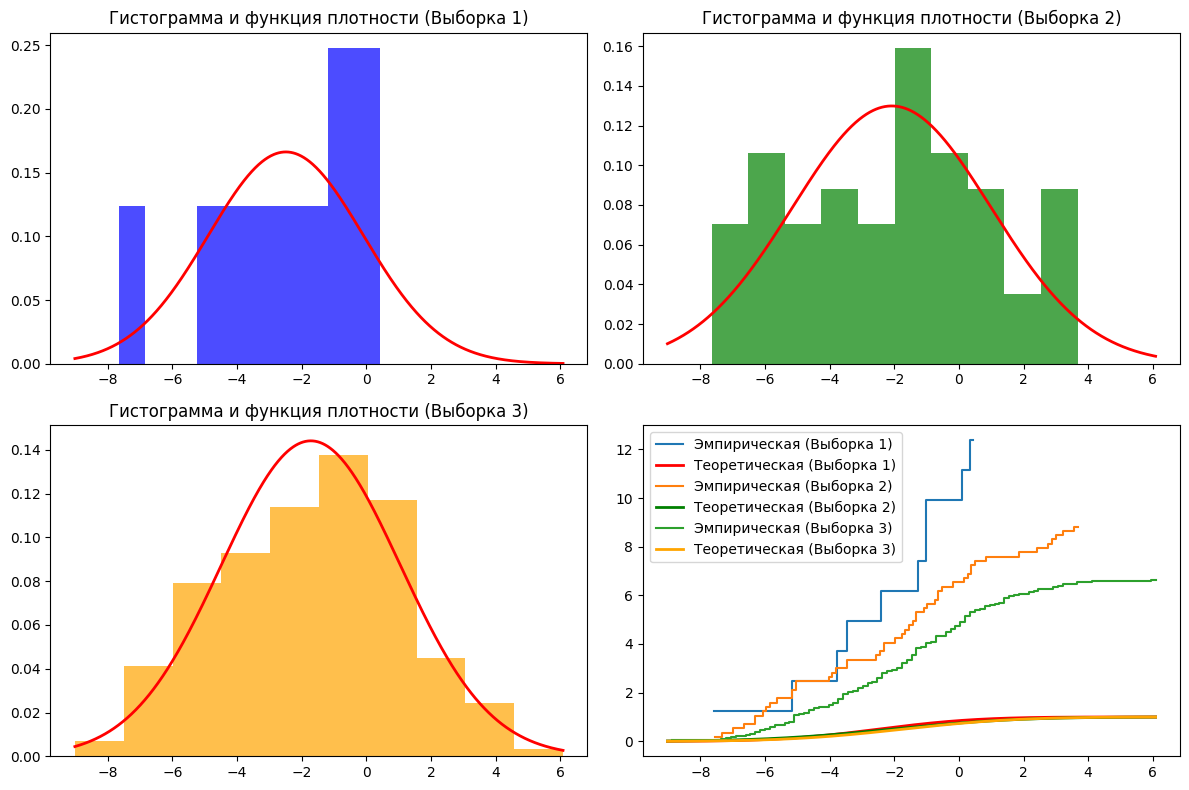



Доверительные интервалы для выборки 1:
Математическое ожидание: (-4.0584928686945805, -0.9237446812427765)
Дисперсия: (3.0256448500140136, 21.314013931468445)


Доверительные интервалы для выборки 2:
Математическое ожидание: (-2.9392270960123374, -1.2192844749089158)
Дисперсия: (6.71679472961178, 14.947576803180002)


Доверительные интервалы для выборки 3:
Математическое ожидание: (-2.1114569336862825, -1.3265210512581)
Дисперсия: (6.36099271834248, 9.509960928068978)




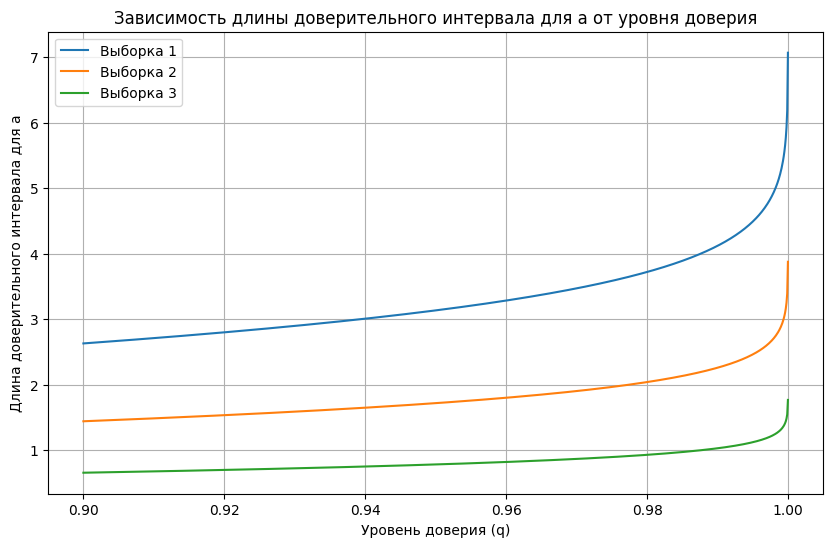

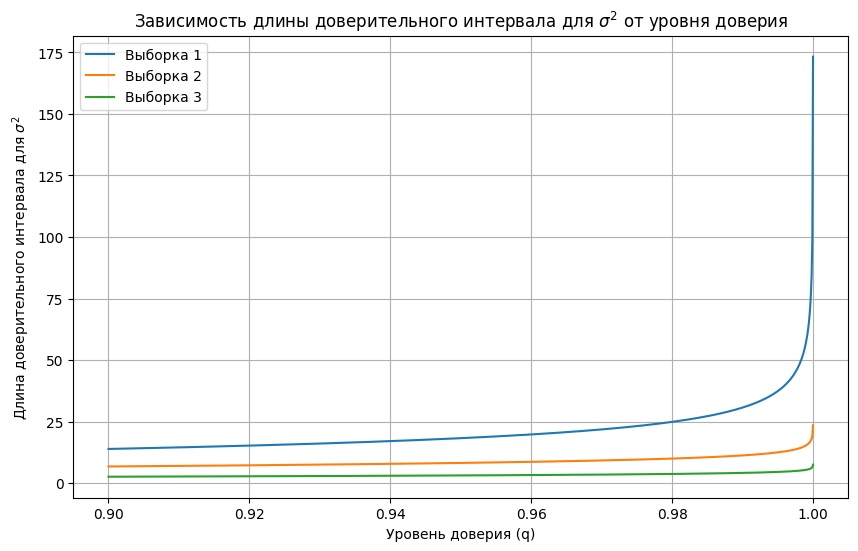

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Загрузите данные из файла
data = pd.read_csv('var21.csv', header=None, names=['Index', 'Values'], skiprows=1)

# Извлечение 3 подвыборок
sample_1 = data.iloc[0:10, 1]
sample_2 = data.iloc[0:50, 1]
sample_3 = data.iloc[:, 1]

# Функция для вычисления основных численных характеристик
def calculate_statistics(sample):
    mean = np.mean(sample) #мат ожидания
    variance = np.var(sample) #выб дисперсия
    unbiased_variance = np.var(sample, ddof=1) #
    quantiles = np.percentile(sample, [25, 50, 75])
    return mean, variance, unbiased_variance, quantiles

# Функция для вычисления доверительных интервалов
def confidence_intervals(sample, confidence_level=0.95):
    n = len(sample)
    mean = np.mean(sample)
    std = np.std(sample, ddof=1)

    # Доверительный интервал для математического ожидания
    mean_interval = stats.norm.interval(confidence_level, loc=mean, scale=std/np.sqrt(n))

    # Доверительный интервал для дисперсии
    var_interval = ((n - 1) * std**2 / stats.chi2.ppf((1 + confidence_level) / 2, n - 1),
                    (n - 1) * std**2 / stats.chi2.ppf((1 - confidence_level) / 2, n - 1))
    return mean_interval, var_interval

# Функция для вычисления длины доверительного интервала для a
def calculate_ci_length(sample, confidence_level):
    mean_interval, _ = confidence_intervals(sample, confidence_level)
    return mean_interval[1] - mean_interval[0]

# Функция для вычисления длины доверительного интервала для sigma^2
def calculate_ci_length_variance(sample, confidence_level):
    _, var_interval = confidence_intervals(sample, confidence_level)
    return var_interval[1] - var_interval[0]

# Уровни доверия от 0.9 до 0.99999 с шагом не менее, чем на 1000 частей
confidence_levels = np.linspace(0.9, 0.99999, 1000)

# Вычисление длины доверительного интервала для каждой выборки
ci_lengths_var_1 = [calculate_ci_length_variance(sample_1, q) for q in confidence_levels]
ci_lengths_var_2 = [calculate_ci_length_variance(sample_2, q) for q in confidence_levels]
ci_lengths_var_3 = [calculate_ci_length_variance(sample_3, q) for q in confidence_levels]


# Вычисление длины доверительного интервала для каждой выборки
ci_lengths_1 = [calculate_ci_length(sample_1, q) for q in confidence_levels]
ci_lengths_2 = [calculate_ci_length(sample_2, q) for q in confidence_levels]
ci_lengths_3 = [calculate_ci_length(sample_3, q) for q in confidence_levels]

# Нахождение доверительных интервалов для всех трех выборок
confidence_intervals_1 = confidence_intervals(sample_1)
confidence_intervals_2 = confidence_intervals(sample_2)
confidence_intervals_3 = confidence_intervals(sample_3)

# Вычисление основных численных характеристик для каждой подвыборки
mean_1, var_1, ub_var_1, quantiles_1 = calculate_statistics(sample_1)
mean_2, var_2, ub_var_2, quantiles_2 = calculate_statistics(sample_2)
mean_3, var_3, ub_var_3, quantiles_3 = calculate_statistics(sample_3)

# Нахождение точечных оценок параметров нормального распределения
a_star_1, sigma2_star_1 = mean_1, var_1
a_star_2, sigma2_star_2 = mean_2, var_2
a_star_3, sigma2_star_3 = mean_3, var_3

# Построение гистограммы и функции плотности нормального распределения
x = np.linspace(min(data['Values']), max(data['Values']), 1000)
pdf_1 = stats.norm.pdf(x, a_star_1, np.sqrt(sigma2_star_1))
pdf_2 = stats.norm.pdf(x, a_star_2, np.sqrt(sigma2_star_2))
pdf_3 = stats.norm.pdf(x, a_star_3, np.sqrt(sigma2_star_3))

plt.figure(figsize=(12, 8))

# Первая подвыборка
plt.subplot(2, 2, 1)
plt.hist(sample_1, bins=10, density=True, alpha=0.7, color='blue')
plt.plot(x, pdf_1, 'r-', lw=2)
plt.title('Гистограмма и функция плотности (Выборка 1)')

# Вторая подвыборка
plt.subplot(2, 2, 2)
plt.hist(sample_2, bins=10, density=True, alpha=0.7, color='green')
plt.plot(x, pdf_2, 'r-', lw=2)
plt.title('Гистограмма и функция плотности (Выборка 2)')

# Третья подвыборка
plt.subplot(2, 2, 3)
plt.hist(sample_3, bins=10, density=True, alpha=0.7, color='orange')
plt.plot(x, pdf_3, 'r-', lw=2)
plt.title('Гистограмма и функция плотности (Выборка 3)')

# Построение графиков эмпирической и теоретической функций распределения
ecdf_1 = np.cumsum(np.histogram(sample_1, bins=100, density=True)[0])
ecdf_2 = np.cumsum(np.histogram(sample_2, bins=100, density=True)[0])
ecdf_3 = np.cumsum(np.histogram(sample_3, bins=100, density=True)[0])

plt.subplot(2, 2, 4)
plt.step(np.histogram(sample_1, bins=100, density=True)[1][1:], ecdf_1, label='Эмпирическая (Выборка 1)')
plt.plot(x, stats.norm.cdf(x, a_star_1, np.sqrt(sigma2_star_1)), 'r-', lw=2, label='Теоретическая (Выборка 1)')

plt.step(np.histogram(sample_2, bins=100, density=True)[1][1:], ecdf_2, label='Эмпирическая (Выборка 2)')
plt.plot(x, stats.norm.cdf(x, a_star_2, np.sqrt(sigma2_star_2)), 'g-', lw=2, label='Теоретическая (Выборка 2)')

plt.step(np.histogram(sample_3, bins=100, density=True)[1][1:], ecdf_3, label='Эмпирическая (Выборка 3)')
plt.plot(x, stats.norm.cdf(x, a_star_3, np.sqrt(sigma2_star_3)), 'orange', lw=2, label='Теоретическая (Выборка 3)')

plt.tight_layout()
plt.legend()
plt.show()

print("\n")
print("Доверительные интервалы для выборки 1:")
print("Математическое ожидание:", confidence_intervals_1[0])
print("Дисперсия:", confidence_intervals_1[1])
print("\n")


print("Доверительные интервалы для выборки 2:")
print("Математическое ожидание:", confidence_intervals_2[0])
print("Дисперсия:", confidence_intervals_2[1])
print("\n")

print("Доверительные интервалы для выборки 3:")
print("Математическое ожидание:", confidence_intervals_3[0])
print("Дисперсия:", confidence_intervals_3[1])
print("\n")

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(confidence_levels, ci_lengths_1, label='Выборка 1')
plt.plot(confidence_levels, ci_lengths_2, label='Выборка 2')
plt.plot(confidence_levels, ci_lengths_3, label='Выборка 3')

plt.xlabel('Уровень доверия (q)')
plt.ylabel('Длина доверительного интервала для a')
plt.title('Зависимость длины доверительного интервала для a от уровня доверия')
plt.legend()
plt.grid(True)
plt.show()
print("\n")

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(confidence_levels, ci_lengths_var_1, label='Выборка 1')
plt.plot(confidence_levels, ci_lengths_var_2, label='Выборка 2')
plt.plot(confidence_levels, ci_lengths_var_3, label='Выборка 3')

plt.xlabel('Уровень доверия (q)')
plt.ylabel('Длина доверительного интервала для $\\sigma^2$')
plt.title('Зависимость длины доверительного интервала для $\\sigma^2$ от уровня доверия')
plt.legend()
plt.grid(True)
plt.show()
